# Random forest regressor for predicting the deep conversion value of peptide.

### This notebook is try to develop a regression model to predict the DC value through random forest regressor. 
### It is divided into following two parts.  

#### 1. Predicting the deep conversion value of tetra peptides with only the feature of amino acid sequences.
#### 2. Predicting the deep conversion value of tetra peptides with the festures of both sequence and vhse property. 


### example for model tuning and cross validation: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74



### Part 1: Predicting the deep conversion value of tetra peptides with only the feature of amino acid sequences.

In [1]:
import pandas as pd ## Load the library
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split

In [2]:
## read csv file into dataframe
df = pd.read_csv (r'DataSet.csv')[:5000]

In [3]:
df.head()

,seq,label,log.label,z1.1,z1.2,z1.3,z2.1,z2.2,z2.3,z3.1,...,vhse3.7,vhse3.8,vhse4.1,vhse4.2,vhse4.3,vhse4.4,vhse4.5,vhse4.6,vhse4.7,vhse4.8
0,TVPT,0.002273,-2.643473,0.92,-2.09,-1.40,-2.69,-2.53,-1.29,-1.22,...,-0.19,3.56,-0.34,-0.51,-0.55,-1.06,-0.06,-0.01,-0.79,0.39
1,VYVY,0.002380,-2.623463,-2.69,-2.53,-1.29,-1.39,2.32,0.01,-2.69,...,-0.24,-0.03,0.61,1.60,1.17,0.73,0.53,0.25,-0.96,-0.52
2,KNML,0.001945,-2.711181,2.84,1.41,-3.14,3.22,1.45,0.84,-2.49,...,-0.86,-0.68,1.36,0.07,0.26,-0.80,0.22,-1.37,0.08,-0.62
3,KTIA,0.001151,-2.939057,2.84,1.41,-3.14,0.92,-2.09,-1.40,-4.44,...,-0.16,-0.13,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
4,LHFR,0.002031,-2.692215,-4.19,-1.03,-0.98,2.41,1.74,1.11,-4.92,...,-1.33,-0.20,-1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83


In [4]:
df.shape

(5000, 47)


max log likehood lambda is 0.26692380917611636


Text(0.5, 1.0, 'Hist of box cox transferred label')

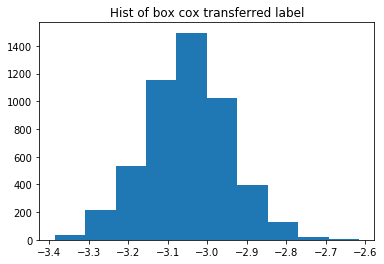

In [5]:

new_label, lambda_val = boxcox(df.label)

print(f'\nmax log likehood lambda is {lambda_val}')

plt.hist(new_label)
plt.title('Hist of box cox transferred label')

#### The sequence column is converted to numerial features with dummies coder. 

In [6]:
all_possible_features = pd.read_csv("082921_all_4mer_SMILES_features_full.csv", index_col = 'AA')

In [7]:
all_possible_features.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
AA,,,,,,,,,,,,,,,,,,,,,
AAAA,-0.000381,-0.001885,0.001924,-0.003132,0.000423,-0.000857,-0.002642,-0.000067,-0.001809,-0.001631,...,-0.001363,-0.000196,0.001626,-0.003016,-0.001227,-0.001046,-0.002094,-0.000144,-0.001863,0.002075
AAAC,0.000791,-0.001547,0.000637,-0.001947,0.001909,-0.001165,-0.001325,0.001219,-0.002190,-0.001649,...,-0.000977,-0.000821,0.001342,-0.002938,-0.001195,-0.000953,-0.002086,-0.000111,-0.001855,0.002089
AAAD,-0.001672,-0.002515,0.001345,-0.000543,-0.002419,-0.000194,0.000429,-0.001601,-0.001893,-0.002710,...,-0.001182,-0.001285,0.001382,-0.003048,-0.001232,-0.000807,-0.002040,-0.000125,-0.001891,0.002168
AAAE,-0.001544,-0.001384,0.001366,-0.004296,-0.001292,-0.002008,-0.001376,0.000847,-0.001075,-0.001412,...,-0.001674,-0.000380,0.001804,-0.003212,-0.001305,-0.000853,-0.002025,-0.000238,-0.001931,0.002208
AAAF,-0.002747,-0.003526,0.001414,-0.003065,-0.000307,0.003386,-0.000732,0.001065,-0.002273,-0.002017,...,-0.001598,-0.000547,0.001698,-0.003082,-0.001333,-0.000864,-0.002097,-0.000208,-0.001929,0.002118


In [8]:
full_data = all_possible_features.loc[df.seq]

#full_data['label'] = new_label
full_data.shape

(5000, 512)

In [9]:
full_data.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
AA,,,,,,,,,,,,,,,,,,,,,
TVPT,-0.000596,0.002301,-0.000652,-0.000422,-0.001604,-0.001402,0.002289,0.001176,-0.003125,0.006254,...,-0.000305,-0.001129,0.001191,0.001863,0.000307,0.006096,0.001968,0.001572,-0.002310,0.002305
VYVY,0.004424,-0.004041,0.001636,0.003654,0.004595,0.001184,0.001205,0.000220,-0.001810,0.000437,...,-0.002275,-0.004572,-0.001000,-0.000736,-0.000153,0.000196,-0.001472,-0.001025,0.004757,0.002577
KNML,0.001620,0.000998,-0.001208,-0.000269,0.001316,-0.000020,-0.000322,-0.000925,0.000505,0.001122,...,-0.000853,0.005258,0.001031,-0.000632,-0.000205,-0.000408,-0.000687,-0.001436,0.005580,0.002802
KTIA,0.001567,0.000126,0.001578,-0.001605,0.000328,-0.003404,-0.000107,-0.002833,0.000113,-0.001666,...,-0.000433,-0.002361,0.000092,0.000360,-0.001018,0.002644,-0.001388,-0.001387,0.004059,0.002587
LHFR,0.000937,-0.002732,-0.001624,0.002074,-0.007026,-0.004133,-0.001269,0.004331,0.001325,0.003525,...,0.001773,0.002510,0.004279,0.004078,-0.002431,-0.001517,0.001807,0.002388,0.000091,0.002780


In [10]:
#split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(full_data, new_label, test_size=0.2, random_state=624)


print(f"Training set shape: {X_train.shape}")
print(f"Training label length: {len(y_train)}")

print(f"Test set shape: {X_test.shape}")
print(f"Test label length: {len(y_test)}")

Training set shape: (4000, 512)
Training label length: 4000
Test set shape: (1000, 512)
Test label length: 1000


(array([8.000e+00, 6.900e+01, 3.790e+02, 1.575e+03, 1.523e+03, 3.830e+02,
        4.900e+01, 1.100e+01, 1.000e+00, 2.000e+00]),
 array([-1.10366762e-02, -8.26686267e-03, -5.49704917e-03, -2.72723568e-03,
         4.25778113e-05,  2.81239130e-03,  5.58220480e-03,  8.35201829e-03,
         1.11218318e-02,  1.38916453e-02,  1.66614588e-02]),
 <a list of 10 Patch objects>)

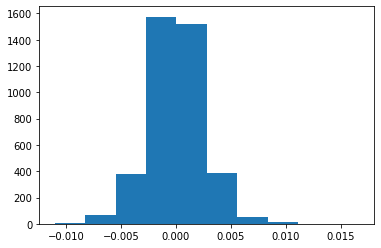

In [11]:
#Training dataset features are close to normal distributed

plt.hist(X_train.iloc[:,1])

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [13]:
import time
start = time.time()
#random forest regressor CV for parameter selection
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

end = time.time()


print(f"FINISHED!\nTotal amount of time is {round(end-start, 2)} seconds.")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
/root/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.3min finished


FINISHED!
Total amount of time is 1348.23 seconds.


In [15]:
rf_random.best_params_

{'n_estimators': 1525,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 85,
 'bootstrap': True}

In [16]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = np.sqrt(np.mean(np.power(predictions - test_labels, 2)))
    print(errors)
    mape = 100 * np.mean(abs(errors / test_labels))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


#accuracy with base model

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)

base_accuracy_train = evaluate(base_model, X_train, y_train)
base_accuracy_test = evaluate(base_model, X_test, y_test)

0.04317759350347782
Model Performance
Average Error: 0.0432 degrees.
Accuracy = 98.58%.
0.10098489307349238
Model Performance
Average Error: 0.1010 degrees.
Accuracy = 96.68%.


In [17]:
#accurary with randon searched best model
best_random = rf_random.best_estimator_

random_accuracy_train = evaluate(best_random, X_train, y_train)
random_accuracy_test = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy_test - base_accuracy_test) / base_accuracy_test))

0.03556428799148597
Model Performance
Average Error: 0.0356 degrees.
Accuracy = 98.83%.
0.09801839937456745
Model Performance
Average Error: 0.0980 degrees.
Accuracy = 96.78%.
Improvement of 0.10%.


In [30]:
#narrow the search 

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = random_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [33]:
all_features = best_random.predict(all_possible_features)

In [40]:
max_pre = max(all_features)

min_pre = min(all_features)

print(max(all_features))
print(min(all_features))

-2.7738424668877646
-3.273038709604433


In [45]:



orign_label_max = np.power((max_pre*lambda_val+1), 1/lambda_val)

orign_label_min = np.power((min_pre*lambda_val+1), 1/lambda_val)


print(f"original max is {orign_label_max}")
print(f"original min is {orign_label_min}")


original max is 0.006393367066790137
original min is 0.0004306530908746068


In [28]:
best_grid = grid_search.best_estimator_

grid_accuracy_train = evaluate(best_grid, X_train, y_train)
grid_accuracy_test = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy_test - base_accuracy_test) / base_accuracy_test))

0.06379396007287808
Model Performance
Average Error: 0.0638 degrees.
Accuracy = 97.91%.
0.10228865029433992
Model Performance
Average Error: 0.1023 degrees.
Accuracy = 96.64%.
Improvement of -0.04%.


#### New dataframe with converted sequence feature is merged. 

In [ ]:
df_merge1=pd.merge(df1,df2,left_index=True, right_index=True)

In [ ]:
df_merge2=pd.merge(df3,df4,left_index=True, right_index=True)

In [ ]:
df_merge3=pd.merge(df_merge1,df_merge2,left_index=True, right_index=True)

In [ ]:
df5=df[['label']]

In [ ]:
df_merge=pd.merge(df_merge3,df5,left_index=True, right_index=True)

In [ ]:
df_merge.head()

In [ ]:
X = df_merge.drop(['s1', 's2','s3','s4','label'], axis=1)
y = df_merge.label

#### Random forest regressor model is used to train and test the dataset. 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#Build RF model
RFR = RandomForestRegressor(n_estimators=150, random_state=0)

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )
#Train RFR
RFR.fit(X_train, y_train)
#RFR prediction result
y_pred = RFR.predict(X_test)

In [ ]:
print(RFR.predict(X_test[:5]))

In [ ]:
print(X_test[:5])

#### A function is defined to inverted converting the dummy code to amino acid sequence. 

In [ ]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
df_Re = undummify(X_test[:10])

In [ ]:
df_Re.head(10)

In [ ]:
print(RFR.predict(X_test[:10]))

In [ ]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comparison

In [ ]:
## Make a plot to compare the actual and predicted DC values for the first 50 test rows. 
import matplotlib.pyplot as plt

x = df_comparison.Actual.head(50)
y = df_comparison.Predicted.head(50)

plt.plot(x, y, 'o', color='black');
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(loc='upper left')
plt.show()

#### Try to input a tetra peptide sequence and predict the DC value. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#### This module is used to converted nested list to a flatten one. 
def flatten(x):
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

print(flatten(["junk",["nested stuff"],[],[[]]]))

In [ ]:
from numpy import argmax
# define input string
data = input("Enter four amino acid:-")
print(data)
# define universe of possible input values
alphabet = 'acdefghiklmnpqrstvwy'
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
integer_encoded = [char_to_int[char] for char in data]
print(integer_encoded)
# one hot encode
onehot_encoded = []
L=[]
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
print(onehot_encoded)
L= flatten(onehot_encoded)
# calculate DC value
print(RFR.predict([L])) ## Predict the DC value with amino acid sequence. 

### Part 2. Predicting the DC value of tetra peptides with the festures of both sequence and vhse property. 

In [ ]:
pip install openpyxl

In [ ]:
df_vhse = pd.read_excel (r'C:\Users\wu2\48Dis\vhse.xlsx') ##load the vhse code for amino acid. 

In [ ]:
df_vhse.head()

In [ ]:
df_vhse.info()

In [ ]:
df_vhse['vhse1'] = df_vhse['vhse1'].str.replace('[^\x00-\x7F]+','-')

In [ ]:

df_vhse['vhse2'] = df_vhse['vhse2'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse3'] = df_vhse['vhse3'].str.replace('[^\x00-\x7F]+','-')

In [ ]:
df_vhse['vhse4'] = df_vhse['vhse4'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse5'] = df_vhse['vhse5'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse6'] = df_vhse['vhse6'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse7'] = df_vhse['vhse7'].str.replace('[^\x00-\x7F]+','-')
df_vhse['vhse8'] = df_vhse['vhse8'].str.replace('[^\x00-\x7F]+','-')

In [ ]:

df_vhse['vhse2'] = df_vhse['vhse2'].astype(np.float64)
df_vhse['vhse3'] = df_vhse['vhse3'].astype(np.float64)
df_vhse['vhse4'] = df_vhse['vhse4'].astype(np.float64)
df_vhse['vhse5'] = df_vhse['vhse5'].astype(np.float64)
df_vhse['vhse6'] = df_vhse['vhse6'].astype(np.float64)
df_vhse['vhse7'] = df_vhse['vhse7'].astype(np.float64)
df_vhse['vhse8'] = df_vhse['vhse8'].astype(np.float64)

In [ ]:
df_vhse.head()

In [ ]:
df_vhse.drop(['vhse_code'],axis=1,inplace=True)

In [ ]:
df_vhse.head()

In [ ]:
df_vhse['code'] = df_vhse[df_vhse.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [ ]:
df_vhse.head()

#### This module is a practise to convert a amino acid into its vhse values. 

In [ ]:
## Find a way to convert input amino acid to vhse code. 
rename_dict = df_vhse.set_index('seq').to_dict()['code']
A1 = input("Provide A1 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A1:
        l1=code
        print(l1)
A2 = input("Provide A2 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A2:
        l2=code
        print(l2)
A3 = input("Provide A3 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A3:
        l3=code
A4 = input("Provide A4 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A4:
        l4=code 
        l5=l1+l2+l3+l4
        print(l5)

#### Start building a dataframe with the vhse properties from the original dataset. 

In [ ]:
last_n_column  = df.iloc[: , -32:] # Get those columns of vhse values. 

In [ ]:
last_n_column.head()

In [ ]:
df_merge_vhse=pd.merge(df_merge3,last_n_column,left_index=True, right_index=True)#merge sequence with vhse features.

In [ ]:
df_merge_vhse=pd.merge(df_merge_vhse,df5,left_index=True, right_index=True)# merge features with the label.

In [ ]:
df_merge_vhse.head() ## A new dataframe with both sequence and vhse features. 

## Use both amino acid sequence and vhse as features for data training and model building. 

In [ ]:
X = df_merge_vhse.drop(['s1', 's2','s3','s4','label'], axis=1) # set the features for training
y = df_merge_vhse.label

In [ ]:
#Build RF model
RFR2 = RandomForestRegressor(n_estimators=150, random_state=0)# Build 150 decision tree. 

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ) # Split training and test dataset, where 30 % used for testing. 
#Train RFR
RFR2.fit(X_train, y_train)
#RFR prediction result
y_pred = RFR2.predict(X_test)

In [ ]:
print(RFR2.predict(X_test[:5]))

In [ ]:
df_comparison2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comparison2

In [ ]:
## Make a plot to compare the actual and predicted DC values for the first 80 test rows. 
import matplotlib.pyplot as plt

x = df_comparison2.Actual.head(80)
y = df_comparison2.Predicted.head(80)
plt.figure(figsize=(6,6))
plt.plot(x, y, 'o', color='blue');
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xlim(0, 0.006)
plt.ylim(0, 0.006)
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2)
plt.legend(loc='upper left')
plt.show()

#### Try to input a tetra peptide sequence and predict the DC value.

In [ ]:
from numpy import argmax
# define input string 
data = input("Enter four amino acid:-")
print(data)
# define universe of possible input values
alphabet = 'acdefghiklmnpqrstvwy'
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
integer_encoded = [char_to_int[char] for char in data]
print(integer_encoded)
# one hot encode
onehot_encoded = []
L=[]
test=[]
l6=[]
l1=[]
l2=[]
l3=[]
l4=[]
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
print(onehot_encoded)
L= flatten(onehot_encoded) ## Get the list of one hote code of amino acids
A1 = input("Provide A1 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A1:
        l1=code.split(',')
        print(l1)
A2 = input("Provide A2 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A2:
        l2=code.split(',')
        print(l2)
A3 = input("Provide A3 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A3:
        l3=code.split(',')
A4 = input("Provide A4 ")
for name, code in rename_dict.items():  # for name, code in dictionary.iteritems():  
    if name == A4:
        l4=code.split(',')
        l5=l1+l2+l3+l4
print(l5)
test_str =l5
res = [float(idx) for idx in test_str]
print(res)
test=L+res
print(test)
print(RFR2.predict([test]))

## Summary
#### One hot encoder method is used to convert the protein sequence into numerical features.  
#### Random forest regressor model was built for predicting the DC value from amino acid sequence with or without the vhse properties. 